In [1]:
import os
import pyBigWig
import numpy as np
import matplotlib.pyplot as plt

dataset_dir = "../dataset/new/"
biosamples = ["A549", "GM12878", "K562"]
HMs = ["H3K4me3", "H3K27ac", "H3K4me1", "H3K36me3", "H3K9me3", "H3K27me3"]

In [2]:
def getFile(path, data_type):
    for f in os.listdir(path):
        if f[-len(data_type):] == data_type:
            return f

def getDataset(biosample, hm):
    dataset_path = dataset_dir + "{}/{}/".format(biosample, hm)
    dataset_path += getFile(dataset_path, data_type="bed")
    with open(dataset_path, "r") as f:
        dataset = f.readlines()
    return dataset

def getPeakLength(dataset):
    peak_lengths = []
    for peak in dataset:
        temp = peak.split("\t")
        peak_lengths.append(int(temp[2])-int(temp[1]))
    return peak_lengths

def getBetweenPeakLength(dataset, threshold=0):
    space_lengths = []
    for idx in range(1, len(dataset)):
        start = int(dataset[idx].split("\t")[1])
        last_end = int(dataset[idx-1].split("\t")[2])
        leng = start-last_end
        if leng > 0 and threshold == 0:
            space_lengths.append(leng)
        elif leng > 0 and leng<=threshold:
            space_lengths.append(leng)
    return space_lengths

In [3]:
def getClusterCount(dataset, extract="all"):
    count = 0
    counts = []
    for idx in range(1, len(dataset)):
        current = dataset[idx].split("\t")
        last = dataset[idx-1].split("\t")
        leng = int(current[1]) - int(last[2])
        if leng <= 1000 and leng > 0:
            count += 1
        elif count > 1:
            counts.append(count)
            count = 0
    return counts

def getClusterLength(dataset):
    length = []
    lengths = []
    for idx in range(1, len(dataset)):
        current = dataset[idx].split("\t")
        last = dataset[idx-1].split("\t")
        leng = int(current[1]) - int(last[2])
        if leng <= 1000 and leng > 0:
            length.append(leng)
        elif len(length) >= 1:
            lengths += length
            length = []
    return lengths

def getBeginAndEndValue(peaks):
    temp = []
    dataset_path = dataset_dir + "{}/{}/".format(biosample, hm)
    dataset_path += getFile(dataset_path, data_type="bigWig")
    bw = pyBigWig.open(dataset_path)
    
    for peak in peaks:
        peak = peak.split("\t")
        temp.append(bw.values(peak[0], int(peak[1]), int(peak[1])+1))
        temp.append(bw.values(peak[0], int(peak[2]), int(peak[2])+1))
        
    return np.array(temp)

[   0.   50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.
  600.  650.  700.  750.  800.  850.  900.  950. 1000. 1050. 1100. 1150.
 1200. 1250. 1300. 1350. 1400. 1450. 1500. 1550. 1600. 1650. 1700. 1750.
 1800. 1850. 1900. 1950. 2000. 2050. 2100. 2150. 2200. 2250. 2300. 2350.
 2400. 2450. 2500. 2550. 2600. 2650. 2700. 2750. 2800. 2850. 2900. 2950.
 3000. 3050. 3100. 3150. 3200. 3250. 3300. 3350. 3400. 3450. 3500. 3550.
 3600. 3650. 3700. 3750. 3800. 3850. 3900. 3950. 4000. 4050. 4100. 4150.
 4200. 4250. 4300. 4350. 4400. 4450. 4500. 4550. 4600. 4650. 4700. 4750.
 4800. 4850. 4900. 4950. 5000.]
[   0.   50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.
  600.  650.  700.  750.  800.  850.  900.  950. 1000. 1050. 1100. 1150.
 1200. 1250. 1300. 1350. 1400. 1450. 1500. 1550. 1600. 1650. 1700. 1750.
 1800. 1850. 1900. 1950. 2000. 2050. 2100. 2150. 2200. 2250. 2300. 2350.
 2400. 2450. 2500. 2550. 2600. 2650. 2700. 2750. 2800. 2850. 2900. 2950.
 3000. 3050. 3100. 

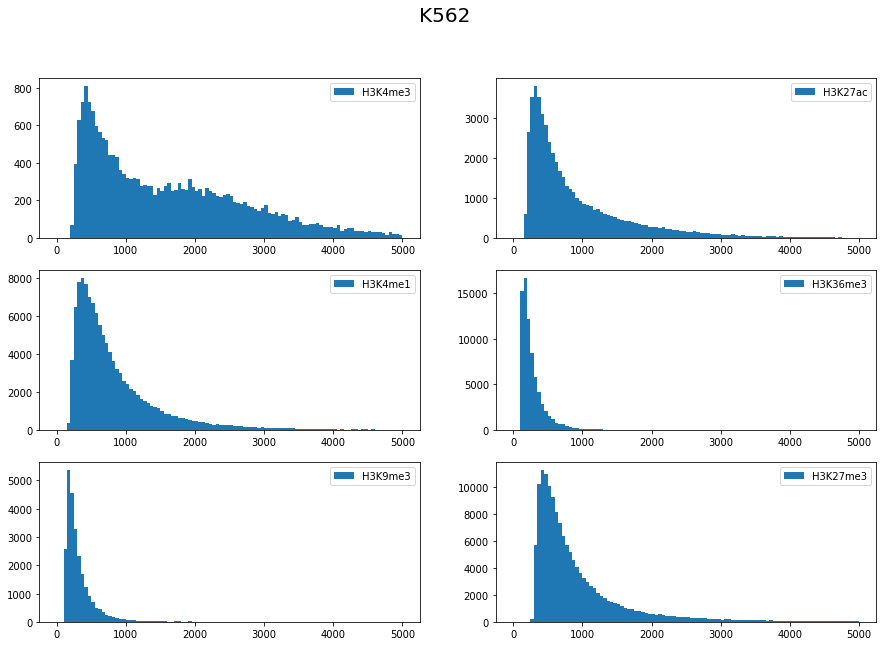

In [7]:
# Get peak file distribution
biosample = biosamples[2]
fig, axs = plt.subplots(3, 2, figsize=(15,10))
fig.suptitle(biosample, fontsize=20)
for ith in range(6):
    hm = HMs[ith]
    dataset = getDataset(biosample, hm)
    peak_lengths = getPeakLength(dataset)
    # space_lengths = getBetweenPeakLength(dataset)
    # cluster_count = getClusterCount(dataset)
    # cluster_length = getBetweenPeakLength(dataset, threshold=1000)
    x, y = ith // 2, 0 if ith%2 == 0 else 1

    fig = axs[x,y].hist(peak_lengths, bins=100, range=(0,5000), label=HMs[ith])
    # fig = axs[x,y].hist(cluster_length, bins=100, label=HMs[ith])
    axs[x,y].legend()
    print(fig[1])

# plt.savefig("/home/huan/Desktop/temp.png")

In [7]:
biosample = biosamples[0]
print(biosample.center(80, "="))
for ith in range(6):
    hm = HMs[ith]
    dataset = getDataset(biosample, hm)
    all_begin_end = getBeginAndEndValue(dataset)
    all_begin_end[np.isnan(all_begin_end)] = 0
    
    print("{} : mean--{} std--{} median--{}".format(hm, np.mean(all_begin_end), np.std(all_begin_end), np.median(all_begin_end)))

======================================A549======================================
H3K4me3 : mean--2.846253299603481 std--0.34965089763288026 median--2.861180067062378
H3K27ac : mean--3.1566228184973313 std--0.3289101806849149 median--3.1648600101470947
H3K4me1 : mean--2.3720156644368044 std--0.2966079941084161 median--2.3687500953674316
H3K36me3 : mean--1.8591604827423711 std--0.22468929964097376 median--1.8797800540924072
H3K9me3 : mean--2.7387202858506665 std--0.34655110823103485 median--2.733330011367798
H3K27me3 : mean--1.8926336531886392 std--0.21227073309846609 median--1.9646300077438354
